In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [347]:
df = pd.DataFrame([[1, 'a'], [2, 'b'], [3, 'c'], [4, 'd']],
                  columns = ['число', 'буква'],
                 )
df

,число,буква
0,1,a
1,2,b
2,3,c
3,4,d


In [348]:
data = pd.read_csv(r"S02-hw-dataset.csv")

In [349]:
data.head(10)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [351]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [352]:
data.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [353]:
data["dupl"] = data.duplicated()
data

,user_id,age,country,purchases,revenue,dupl
0,1,25.0,FR,7,749,False
1,2,24.0,RU,5,1115,False
2,3,52.0,FR,7,399,False
3,4,31.0,RU,6,654,False
4,5,NaN,DE,6,1296,False
5,6,120.0,FR,-1,785,False
6,7,46.0,RU,0,0,False
7,8,28.0,CN,2,456,False
8,9,39.0,US,4,980,False
9,10,24.0,RU,7,511,False


In [354]:
data[data['dupl'] == True]

,user_id,age,country,purchases,revenue,dupl
40,10,24.0,RU,7,511,True


In [355]:
data[data.duplicated(subset="user_id", keep=False)]

,user_id,age,country,purchases,revenue,dupl
9,10,24.0,RU,7,511,False
40,10,24.0,RU,7,511,True


In [356]:
data[ (data.age.isna()) |\
      (data.age > 100)  |\
      (data.age < 10)  |\
      (data.purchases < 0)
    ]

,user_id,age,country,purchases,revenue,dupl
4,5,NaN,DE,6,1296,False
5,6,120.0,FR,-1,785,False
12,13,NaN,US,9,630,False
20,21,5.0,RU,8,1488,False


### Подозрительные случаи
1. Отсутствующие значения
    + `Nan` в столбце `age` 
2. Дублирующиеся значения
    + Полностью одинаковые строки с индексом 9 и 40
3. Нереалистичные значения
    + Слишком большие или маленькие значения в столбце `age`
    + Отрицательные значения в столбце `purchases`



In [357]:
data.value_counts("country", normalize = True) #относительная частота каждой категории в столбце country


country
RU    0.317073
FR    0.292683
US    0.195122
DE    0.146341
CN    0.048780
Name: proportion, dtype: float64

In [358]:
data.value_counts("age", normalize = True) #заметим, что не подсчитываются отсутствующие значение

age
24.0     0.128205
28.0     0.051282
32.0     0.051282
31.0     0.051282
47.0     0.051282
52.0     0.051282
39.0     0.051282
35.0     0.051282
21.0     0.025641
20.0     0.025641
18.0     0.025641
5.0      0.025641
26.0     0.025641
22.0     0.025641
23.0     0.025641
25.0     0.025641
36.0     0.025641
42.0     0.025641
34.0     0.025641
33.0     0.025641
45.0     0.025641
43.0     0.025641
46.0     0.025641
51.0     0.025641
54.0     0.025641
55.0     0.025641
57.0     0.025641
120.0    0.025641
Name: proportion, dtype: float64

In [359]:
result= pd.cut(data['revenue'], bins = 3, labels = ["Low", "Medium", "High"])
result

0        Low
1     Medium
2        Low
3        Low
4     Medium
5        Low
6        Low
7        Low
8     Medium
9        Low
10       Low
11      High
12       Low
13      High
14       Low
15       Low
16    Medium
17       Low
18       Low
19       Low
20    Medium
21       Low
22    Medium
23      High
24       Low
25       Low
26    Medium
27    Medium
28    Medium
29       Low
30       Low
31    Medium
32       Low
33       Low
34       Low
35       Low
36    Medium
37       Low
38    Medium
39      High
40       Low
Name: revenue, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [360]:
bins = [0, 17, 35, 60, 120]
labels = [
    'minor',    # несовершеннолетний
    'young',    # молодой
    'mature',   # зрелый
    'elderly'   # 
]
data['age_group'] = pd.cut(data['age'], bins = bins, labels = labels)
data


,user_id,age,country,purchases,revenue,dupl,age_group
0,1,25.0,FR,7,749,False,young
1,2,24.0,RU,5,1115,False,young
2,3,52.0,FR,7,399,False,mature
3,4,31.0,RU,6,654,False,young
4,5,NaN,DE,6,1296,False,NaN
5,6,120.0,FR,-1,785,False,elderly
6,7,46.0,RU,0,0,False,mature
7,8,28.0,CN,2,456,False,young
8,9,39.0,US,4,980,False,mature
9,10,24.0,RU,7,511,False,young


In [361]:
data["ratio"] = data["revenue"] / data["purchases"] # средний чек покупки
data

,user_id,age,country,purchases,revenue,dupl,age_group,ratio
0,1,25.0,FR,7,749,False,young,107.0
1,2,24.0,RU,5,1115,False,young,223.0
2,3,52.0,FR,7,399,False,mature,57.0
3,4,31.0,RU,6,654,False,young,109.0
4,5,NaN,DE,6,1296,False,NaN,216.0
5,6,120.0,FR,-1,785,False,elderly,-785.0
6,7,46.0,RU,0,0,False,mature,NaN
7,8,28.0,CN,2,456,False,young,228.0
8,9,39.0,US,4,980,False,mature,245.0
9,10,24.0,RU,7,511,False,young,73.0


In [362]:
group = data.groupby("country")

In [363]:
group["ratio"].mean()

country
CN    232.000000
DE    223.666667
FR     58.909091
RU    168.545455
US    135.750000
Name: ratio, dtype: float64

In [364]:
data["age_group"].value_counts(normalize=True)

age_group
young      0.564103
mature     0.384615
minor      0.025641
elderly    0.025641
Name: proportion, dtype: float64

In [365]:
group['age_group'].value_counts()

country  age_group
CN       young        2
         minor        0
         mature       0
         elderly      0
DE       young        3
         mature       2
         minor        0
         elderly      0
FR       mature       6
         young        5
         elderly      1
         minor        0
RU       young        9
         mature       3
         minor        1
         elderly      0
US       mature       4
         young        3
         minor        0
         elderly      0
Name: count, dtype: int64

In [366]:
group["purchases"].sum()

country
CN     9
DE    39
FR    51
RU    62
US    37
Name: purchases, dtype: int64

In [367]:
group["revenue"].sum()

country
CN     2108
DE     8673
FR     8111
RU    10271
US     4459
Name: revenue, dtype: int64

In [368]:
group["revenue"].mean()

country
CN    1054.000000
DE    1445.500000
FR     675.916667
RU     790.076923
US     557.375000
Name: revenue, dtype: float64

## Выводы после EDA
- Самый часто встречаемый возраст пользователей 24 (~13%)
- Больше всего пользователей из возрастной группы молодежь (~56%)
- Больше всего пользователей из России (~32%) и Франции (~29%)
- Больше всего покупок было совершенно в России (62 штуки)
- Больше всего дохода было получено в России (10 271)
- Самый высокий показатель среднего дохода с одной покупки принадлежит Китаю (232).
- А самый высокий показатель среднего дохода с одного пользователя принадлежит Германии.

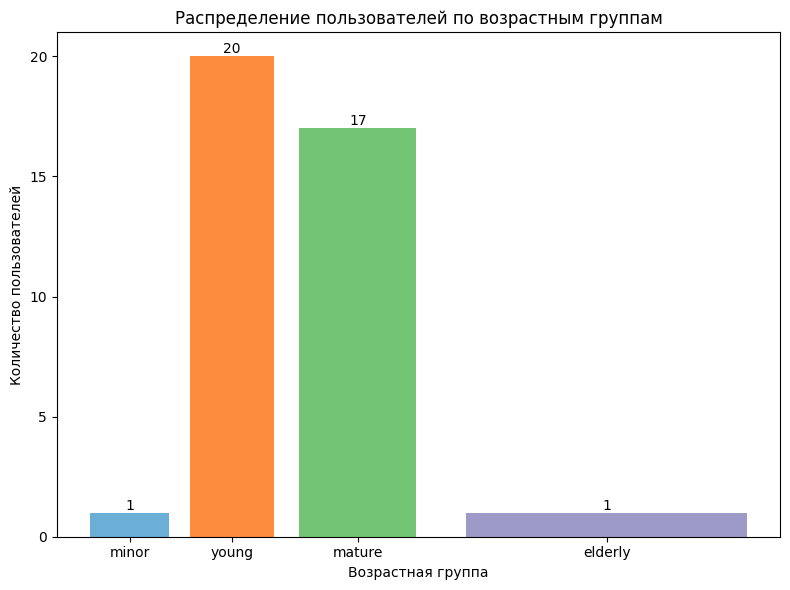

In [369]:
# Гистограмма

fig, ax = plt.subplots(  # создаем полотно
    figsize=(8, 6)  # размер полотна
)

_, _,patches = ax.hist(
    data["age"],  # данные берем из столбца с возрастом
    bins=bins,  # бины [0, 17, 30, 50, 100]
    rwidth=0.8  # столбцы с зазорами (для явного разделения возрастных групп)
)
ax.set_title("Распределение пользователей по возрастным группам")
ax.set_xlabel("Возрастная группа")
ax.set_ylabel("Количество пользователей")

plt.bar_label(patches)
    
# Добавим подписи под столбцами
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]  # вычисляем центры бинов для правильных позиций меток
ax.set_xticks(bin_centers)  # ставим метки на bin_centers (в нашем случае [8.5, 23.5, 40.0, 75.0])
ax.set_xticklabels(labels)  # подписываем каждую метку с помощью labels
ax.set_yticks([0, 5, 10, 15, 20])

# Раскрасим каждый столбец
colors = plt.get_cmap('tab20c')
for i, rect in enumerate(patches):
    rect.set_fc(colors(4*i + 1))

plt.tight_layout()
plt.show() # отображаем полотна

# fig.savefig("figures/hist.png")

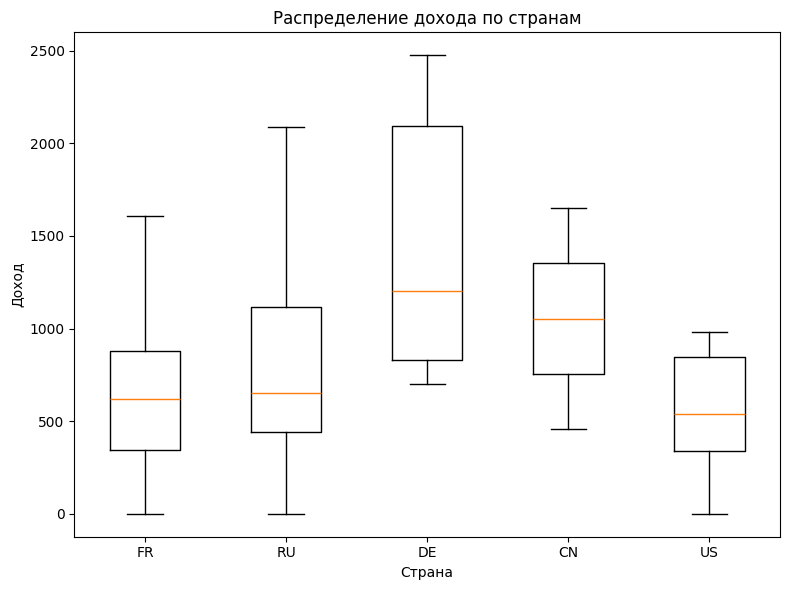

In [370]:
# Ящики с усами

countries = data["country"].dropna().unique()  # получим все присутствующие в записях страны (dropna() - за исключением пустых)

fig, ax = plt.subplots(
    figsize=(8, 6)
)

ax.boxplot(
    [data[data["country"] == country]["revenue"] for country in countries],  # для каждой страны берем данные о доходе
    tick_labels=countries
)
ax.set_title('Распределение дохода по странам')
ax.set_xlabel('Страна')
ax.set_ylabel('Доход')

plt.tight_layout()
plt.show()

# fig.savefig("figures/boxplot.png")

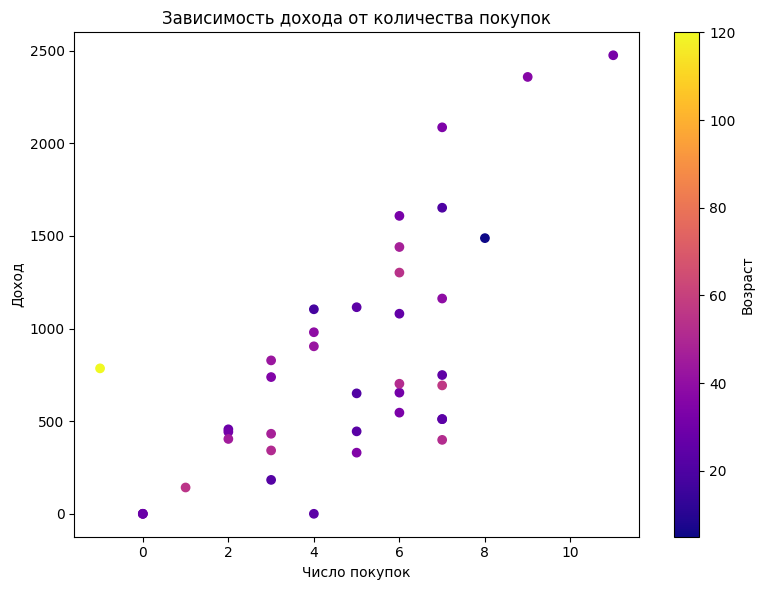

In [371]:
# Диграмма рассеяния

fig, ax = plt.subplots(
    figsize=(8, 6)
)

scatter = ax.scatter(
    x=data["purchases"],        # по оси X откладываем возраст
    y=data["revenue"],  # по оси Y - число покупок
    c=data["age"],  # цвет будем ранжировать по числу покупок
    cmap='plasma'         # используем такой colormap
)
cbar = plt.colorbar(scatter, ax=ax)  # отображаем цветовую карту со шкалой значений
ax.set_title('Зависимость дохода от количества покупок')
ax.set_xlabel('Число покупок')
ax.set_ylabel('Доход')
cbar.set_label("Возраст")

plt.tight_layout()
plt.show()

# fig.savefig("figures/scatter.png")